In [ ]:
import pandas as pd 
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [ ]:
DB=pd.read_csv('House_price_India.csv')
DB.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [ ]:
DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [ ]:
DB=DB.drop(['id','Date','Built Year','Renovation Year','Postal Code','Lattitude','Longitude','living_area_renov','lot_area_renov'],axis=1)

In [ ]:
DB.rename(columns={"living area": "living_area"}, inplace=True)
DB.rename(columns={"lot area": "lot_area"}, inplace=True)
DB.rename(columns={"Area of the house(excluding basement)": "Area_of_the_house"}, inplace=True)
DB.rename(columns={"Distance from the airport": "Distance_from_the_airport"}, inplace=True)

In [ ]:
DB.rename(columns={"number of bedrooms": "number_of_bedrooms"}, inplace=True)
DB.rename(columns={"number of bathrooms": "number_of_bathrooms"}, inplace=True)
DB.rename(columns={"number of floors": "number_of_floors"}, inplace=True)
DB.rename(columns={"number of views": "number_of_views"}, inplace=True)
DB.rename(columns={"condition of the house": "condition_of_the_house"}, inplace=True)
DB.rename(columns={"grade of the house": "grade_of_the_house"}, inplace=True)
DB.rename(columns={"Number of schools nearby": "Number_of_schools_nearby"}, inplace=True)

In [ ]:
DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   number_of_bedrooms         14620 non-null  int64  
 1   number_of_bathrooms        14620 non-null  float64
 2   living_area                14620 non-null  int64  
 3   lot_area                   14620 non-null  int64  
 4   number_of_floors           14620 non-null  float64
 5   waterfront present         14620 non-null  int64  
 6   number_of_views            14620 non-null  int64  
 7   condition_of_the_house     14620 non-null  int64  
 8   grade_of_the_house         14620 non-null  int64  
 9   Area_of_the_house          14620 non-null  int64  
 10  Area of the basement       14620 non-null  int64  
 11  Number_of_schools_nearby   14620 non-null  int64  
 12  Distance_from_the_airport  14620 non-null  int64  
 13  Price                      14620 non-null  int

***Univariate Analysis of continuous Variables***

In [ ]:
DB[['living_area','lot_area','Area_of_the_house','Area of the basement','Distance_from_the_airport','Price']].describe()

,living_area,lot_area,Area_of_the_house,Area of the basement,Distance_from_the_airport,Price
count,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,2098.262996,1.509328e+04,1801.783926,296.479070,64.950958,5.389322e+05
std,928.275721,3.791962e+04,833.809963,448.551409,8.936008,3.675324e+05
min,370.000000,5.200000e+02,370.000000,0.000000,50.000000,7.800000e+04
25%,1440.000000,5.010750e+03,1200.000000,0.000000,57.000000,3.200000e+05
50%,1930.000000,7.620000e+03,1580.000000,0.000000,65.000000,4.500000e+05
75%,2570.000000,1.080000e+04,2240.000000,580.000000,73.000000,6.450000e+05
max,13540.000000,1.074218e+06,9410.000000,4820.000000,80.000000,7.700000e+06


<Axes: xlabel='living_area', ylabel='Count'>

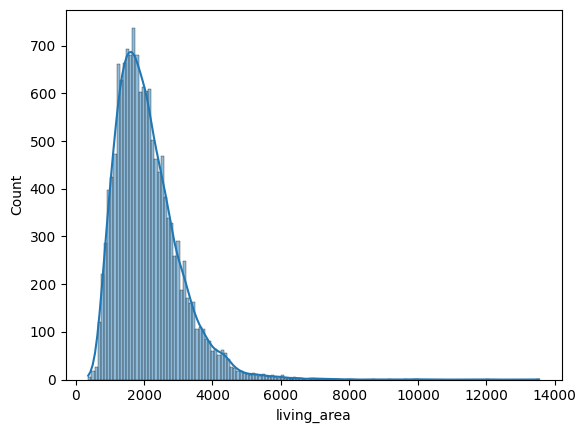

In [ ]:
sns.histplot(DB.living_area,kde=True)

By analyzing the above plot, we find that very few houses are above the living area of 4000 Also, the house with the living area range between the 370sq to 4000sq is the most

<Axes: xlabel='lot_area', ylabel='Count'>

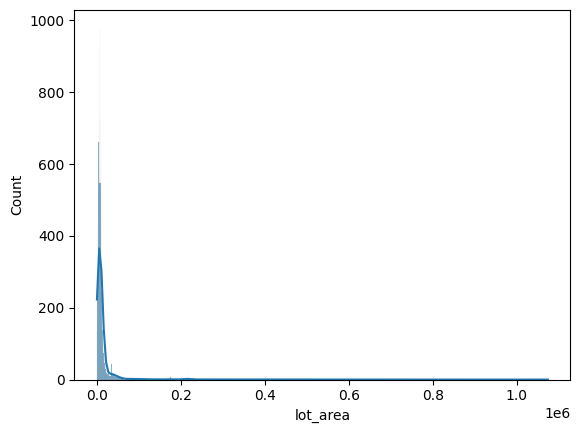

In [ ]:
sns.histplot(DB.lot_area,kde=True)

<Axes: xlabel='Area_of_the_house', ylabel='Count'>

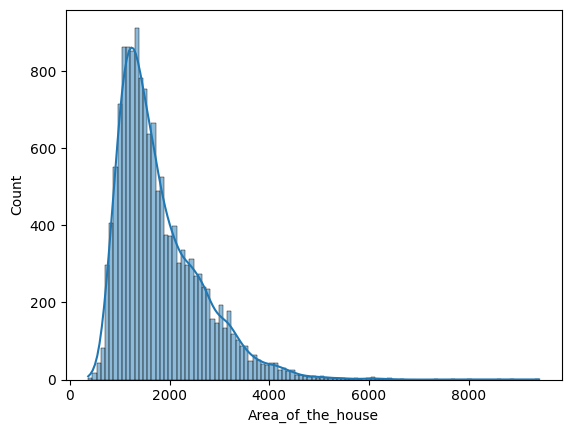

In [ ]:
sns.histplot(DB.Area_of_the_house,kde=True)

By analyzing the above plot, we find that very few houses are above the living area of 4000 Also, the house with the living area range between the 370sq to 4000sq is the most

<Axes: xlabel='Distance_from_the_airport', ylabel='Count'>

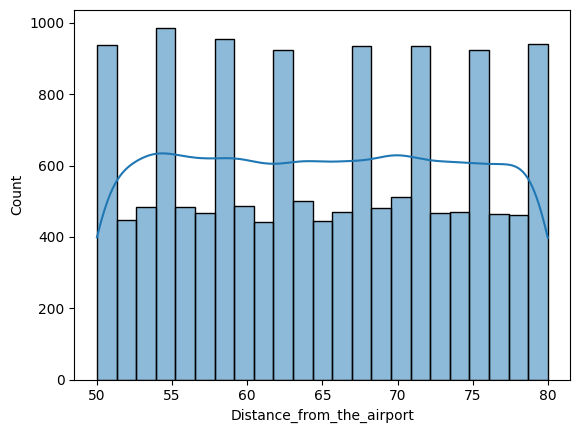

In [ ]:
sns.histplot(DB.Distance_from_the_airport,kde=True)

there is number of house for various distance from airport

<Axes: xlabel='Price', ylabel='Count'>

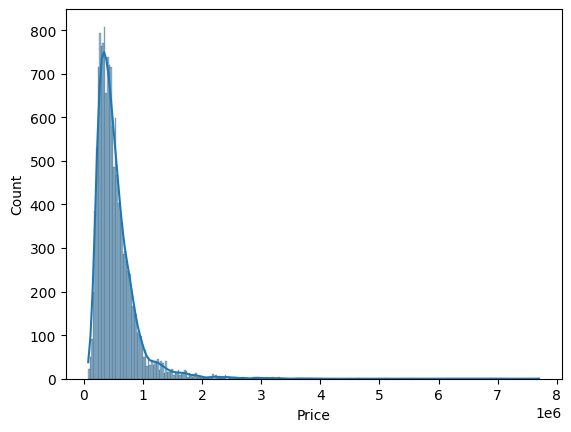

In [ ]:
sns.histplot(DB.Price,kde=True)

*** Bivariate Analysis ***

In [ ]:
DB[['living_area','lot_area','Area_of_the_house','Area of the basement','Distance_from_the_airport','Price']].corr()

,living_area,lot_area,Area_of_the_house,Area of the basement,Distance_from_the_airport,Price
living_area,1.000000,0.174420,0.875793,0.441491,0.002511,0.712169
lot_area,0.174420,1.000000,0.183553,0.019755,0.003291,0.081992
Area_of_the_house,0.875793,0.183553,1.000000,-0.046445,0.001222,0.615220
Area of the basement,0.441491,0.019755,-0.046445,1.000000,0.002926,0.330202
Distance_from_the_airport,0.002511,0.003291,0.001222,0.002926,1.000000,0.003804
Price,0.712169,0.081992,0.615220,0.330202,0.003804,1.000000


***Scatterplot between living area and price***

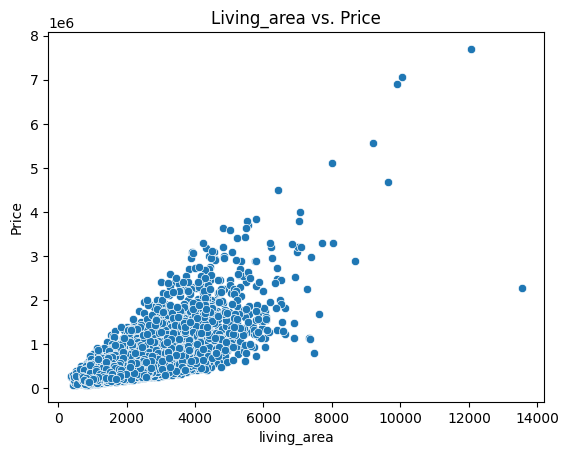

In [ ]:
sns.scatterplot(data=DB,x='living_area',y='Price')
plt.title('Living_area vs. Price')
plt.xlabel('living_area')
plt.ylabel('Price')
plt.show()

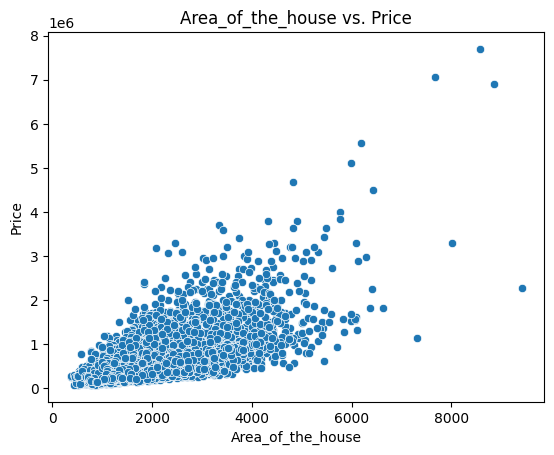

In [ ]:
sns.scatterplot(data=DB,x='Area_of_the_house',y='Price')
plt.title('Area_of_the_house vs. Price')
plt.xlabel('Area_of_the_house')
plt.ylabel('Price')
plt.show()

Both the scatter plot show a linear trend as the area increases prices too increases and the price of one how to another varies more for higher area 

In [ ]:
DB.groupby(by='grade_of_the_house').agg('mean')[['living_area','lot_area','Area_of_the_house','Area of the basement','Distance_from_the_airport','Price']]

,living_area,lot_area,Area_of_the_house,Area of the basement,Distance_from_the_airport,Price
grade_of_the_house,,,,,,
4,705.294118,17583.529412,693.529412,11.764706,65.411765,2.145882e+05
5,1000.084416,23843.766234,964.045455,36.038961,63.045455,2.361458e+05
6,1193.048338,12631.092900,1069.364048,123.684290,65.359517,2.949896e+05
7,1693.325570,12014.383796,1406.662286,286.663284,64.838130,3.974866e+05
8,2183.168721,13585.150109,1865.902828,317.265893,64.986464,5.394682e+05
9,2879.414661,20789.704595,2558.818381,320.596280,65.012582,7.655474e+05
10,3524.263682,26931.047264,3124.557214,399.706468,65.221393,1.058366e+06
11,4462.282143,33479.703571,3909.446429,552.835714,64.971429,1.491944e+06
12,5382.727273,40344.454545,4485.345455,897.381818,64.090909,2.153545e+06


From the above table we can understand that the higher the grade the likely to buy 

<Axes: xlabel='Price', ylabel='Density'>

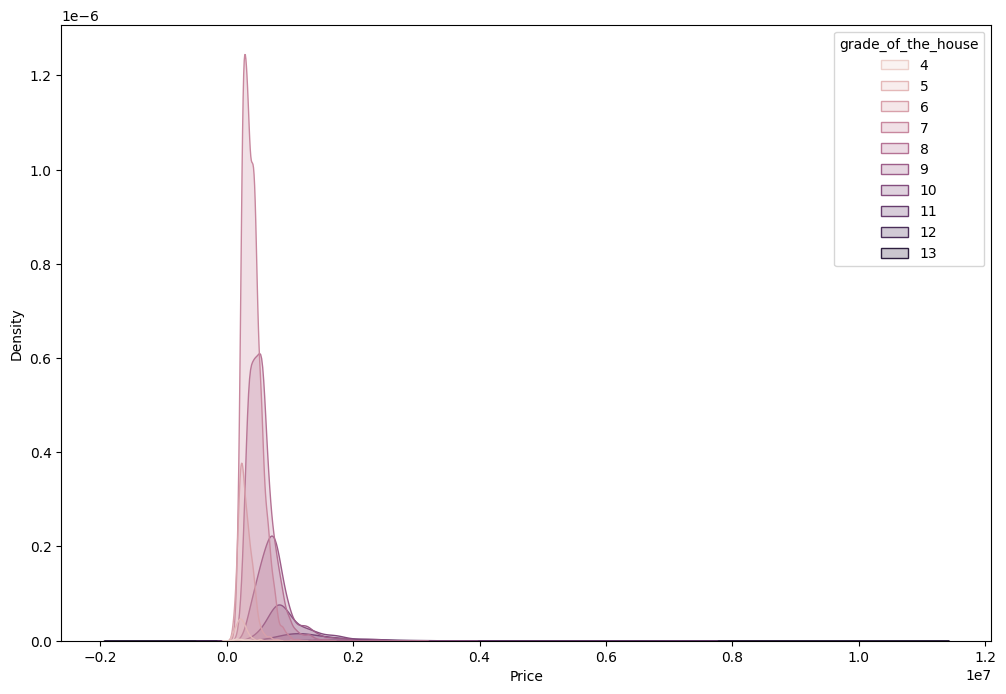

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=DB,x='Price',hue='grade_of_the_house',fill=True)

***Multivariate Analysis***

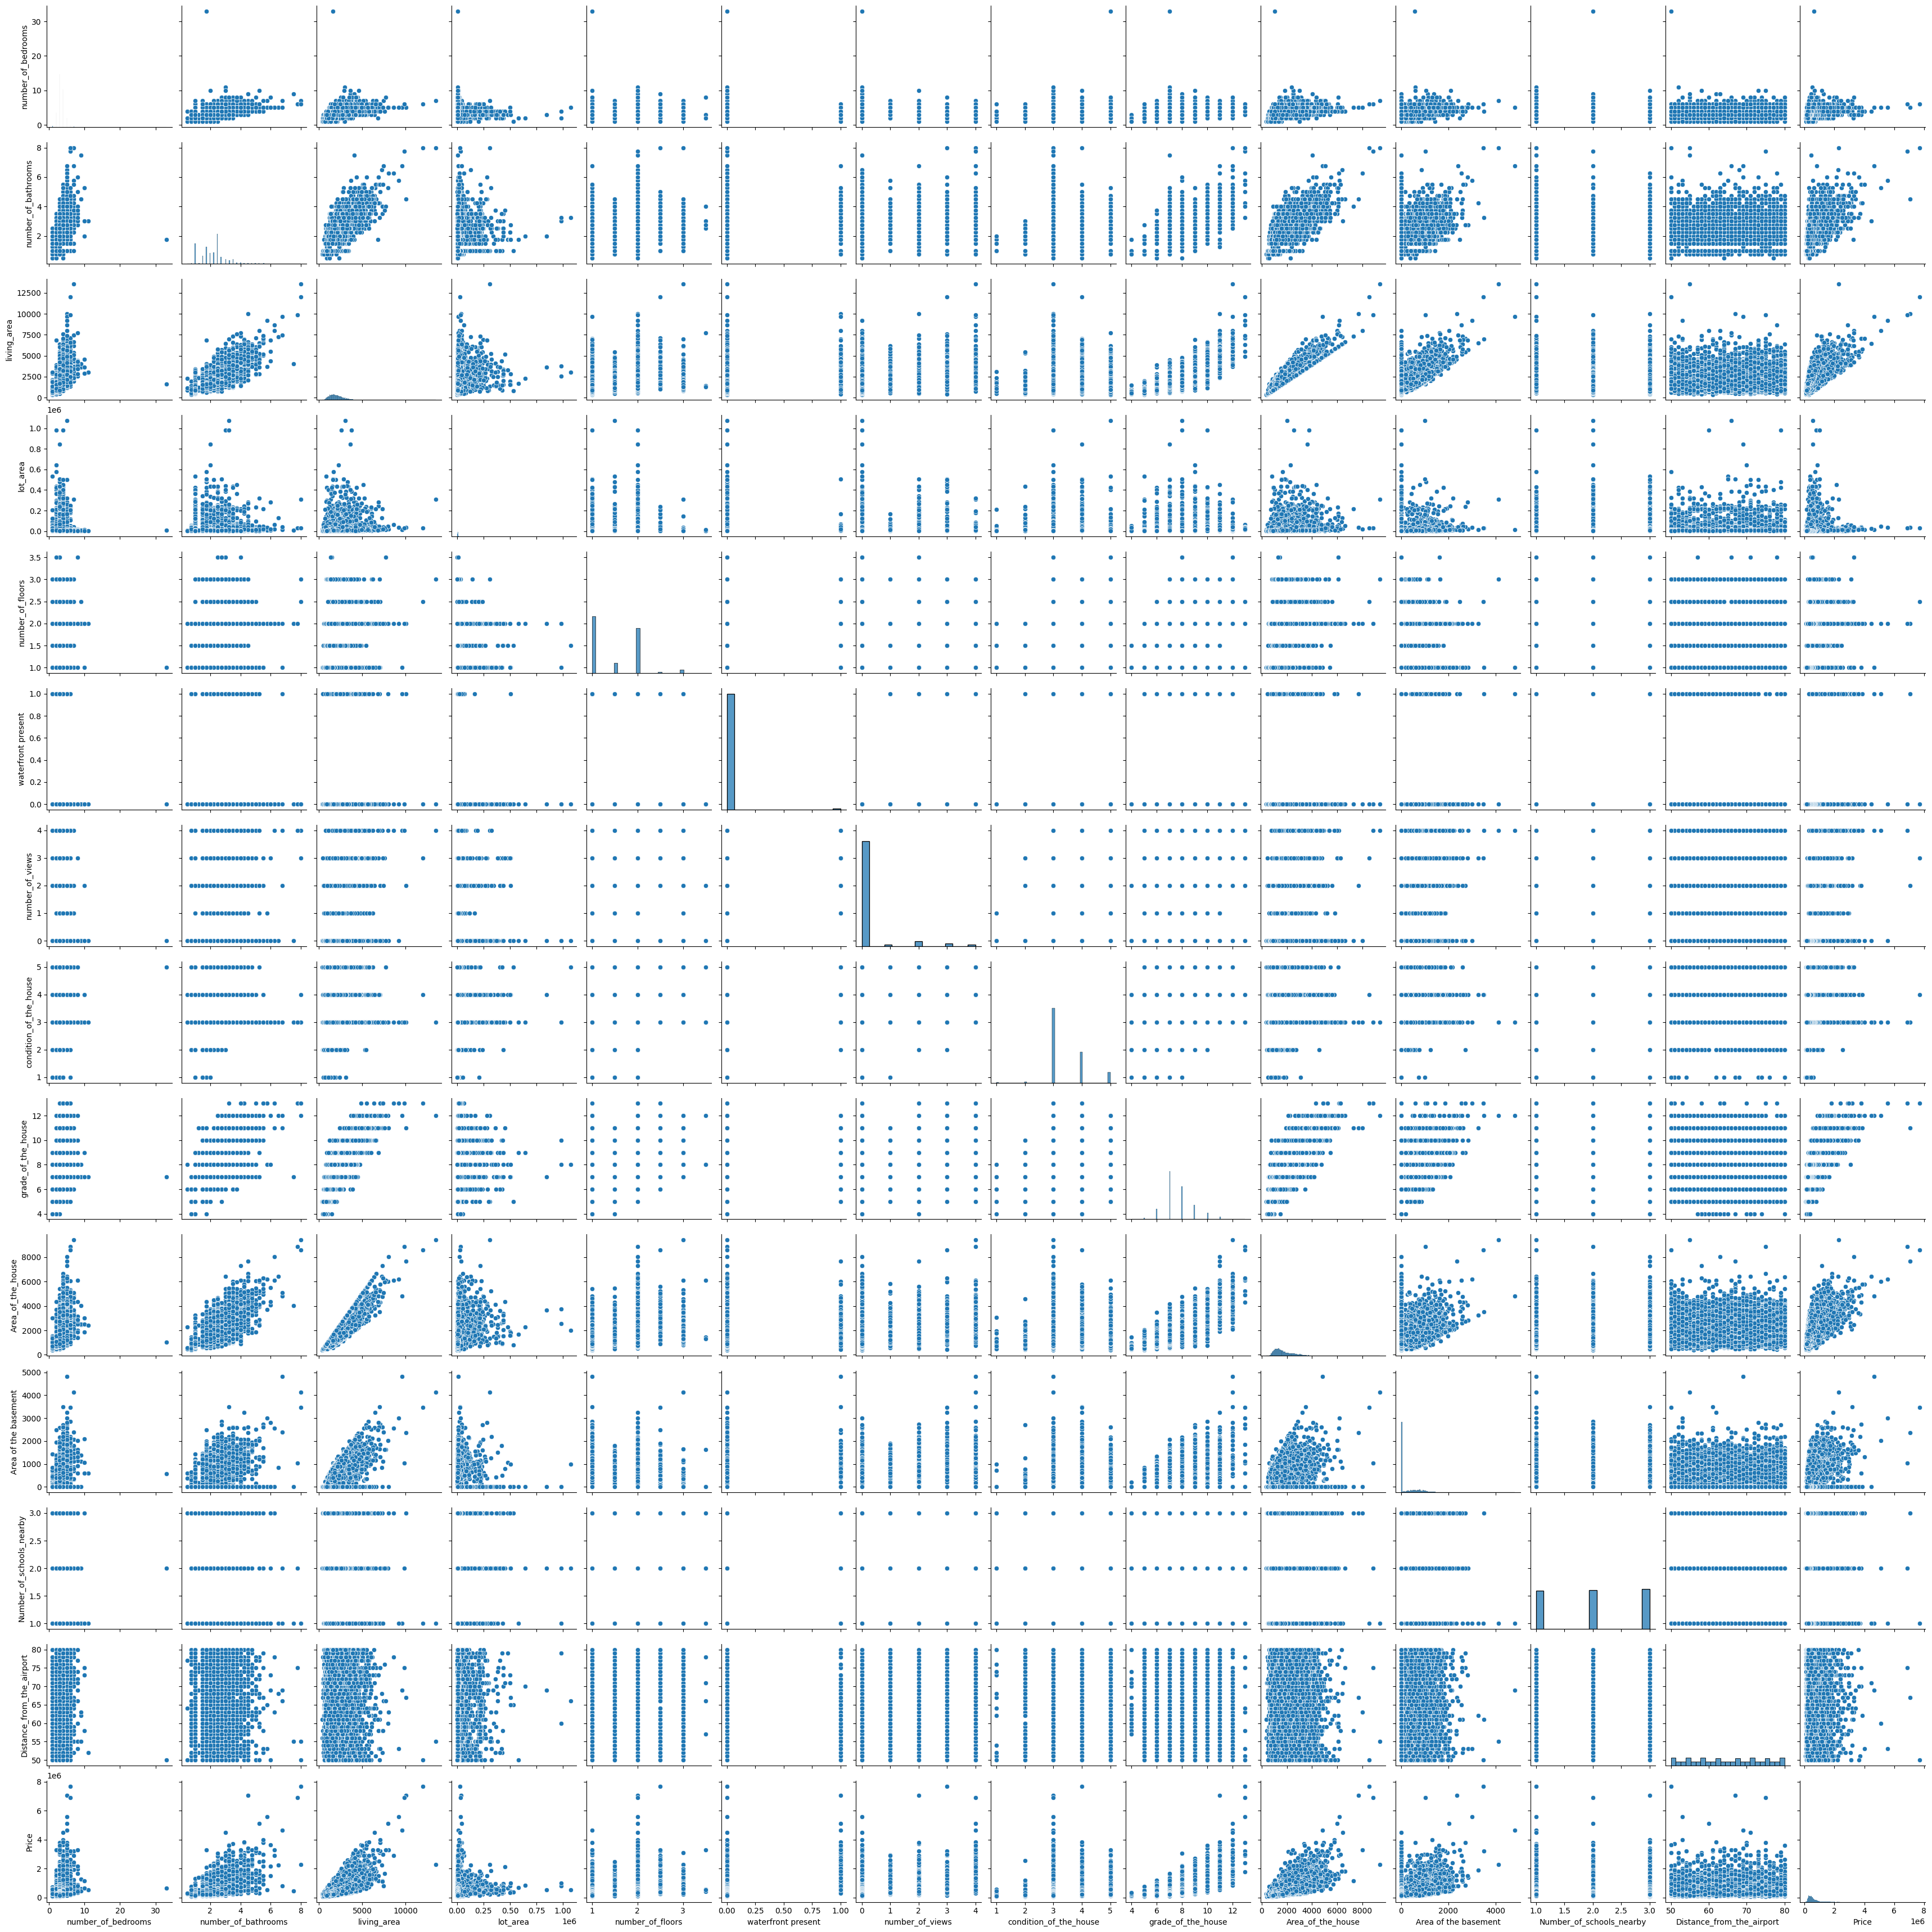

In [ ]:
sns.pairplot(DB)

***Descriptive Statistics***

In [ ]:
DB.mean()

number_of_bedrooms                3.379343
number_of_bathrooms               2.129583
living_area                    2098.262996
lot_area                      15093.281122
number_of_floors                  1.502360
waterfront present                0.007661
number_of_views                   0.233105
condition_of_the_house            3.430506
grade_of_the_house                7.682421
Area_of_the_house              1801.783926
Area of the basement            296.479070
Number_of_schools_nearby          2.012244
Distance_from_the_airport        64.950958
Price                        538932.218331
dtype: float64

In [ ]:
DB.median()

number_of_bedrooms                3.00
number_of_bathrooms               2.25
living_area                    1930.00
lot_area                       7620.00
number_of_floors                  1.50
waterfront present                0.00
number_of_views                   0.00
condition_of_the_house            3.00
grade_of_the_house                7.00
Area_of_the_house              1580.00
Area of the basement              0.00
Number_of_schools_nearby          2.00
Distance_from_the_airport        65.00
Price                        450000.00
dtype: float64

In [ ]:
DB.mode()

,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront present,number_of_views,condition_of_the_house,grade_of_the_house,Area_of_the_house,Area of the basement,Number_of_schools_nearby,Distance_from_the_airport,Price
0,3,2.5,1400,5000,1.0,0,0,3,7,1010,0,3,54,450000


In [ ]:
DB.std()

number_of_bedrooms                0.938719
number_of_bathrooms               0.769934
living_area                     928.275721
lot_area                      37919.621304
number_of_floors                  0.540239
waterfront present                0.087193
number_of_views                   0.766259
condition_of_the_house            0.664151
grade_of_the_house                1.175033
Area_of_the_house               833.809963
Area of the basement            448.551409
Number_of_schools_nearby          0.817284
Distance_from_the_airport         8.936008
Price                        367532.380804
dtype: float64

In [ ]:
DB.var()

number_of_bedrooms           8.811931e-01
number_of_bathrooms          5.927991e-01
living_area                  8.616958e+05
lot_area                     1.437898e+09
number_of_floors             2.918578e-01
waterfront present           7.602572e-03
number_of_views              5.871521e-01
condition_of_the_house       4.410968e-01
grade_of_the_house           1.380702e+00
Area_of_the_house            6.952391e+05
Area of the basement         2.011984e+05
Number_of_schools_nearby     6.679532e-01
Distance_from_the_airport    7.985224e+01
Price                        1.350801e+11
dtype: float64

In [ ]:
DB.mad()

<ipython-input-53-5ef39b19fe4f>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  DB.mad()


number_of_bedrooms                0.735338
number_of_bathrooms               0.611981
living_area                     703.190166
lot_area                      13797.811538
number_of_floors                  0.488557
waterfront present                0.015204
number_of_views                   0.420865
condition_of_the_house            0.576201
grade_of_the_house                0.930951
Area_of_the_house               646.246778
Area of the basement            368.138286
Number_of_schools_nearby          0.671972
Distance_from_the_airport         7.741055
Price                        233142.584638
dtype: float64

In [ ]:
DB.max()-DB.min()

number_of_bedrooms                32.0
number_of_bathrooms                7.5
living_area                    13170.0
lot_area                     1073698.0
number_of_floors                   2.5
waterfront present                 1.0
number_of_views                    4.0
condition_of_the_house             4.0
grade_of_the_house                 9.0
Area_of_the_house               9040.0
Area of the basement            4820.0
Number_of_schools_nearby           2.0
Distance_from_the_airport         30.0
Price                        7622000.0
dtype: float64

In [ ]:
DB.skew()

number_of_bedrooms            2.663257
number_of_bathrooms           0.556663
living_area                   1.538337
lot_area                     10.155206
number_of_floors              0.586158
waterfront present           11.294672
number_of_views               3.409219
condition_of_the_house        1.018018
grade_of_the_house            0.777584
Area_of_the_house             1.436446
Area of the basement          1.609744
Number_of_schools_nearby     -0.022519
Distance_from_the_airport     0.006114
Price                         4.269298
dtype: float64

In [ ]:
DB.quantile()

number_of_bedrooms                3.00
number_of_bathrooms               2.25
living_area                    1930.00
lot_area                       7620.00
number_of_floors                  1.50
waterfront present                0.00
number_of_views                   0.00
condition_of_the_house            3.00
grade_of_the_house                7.00
Area_of_the_house              1580.00
Area of the basement              0.00
Number_of_schools_nearby          2.00
Distance_from_the_airport        65.00
Price                        450000.00
Name: 0.5, dtype: float64

In [ ]:
DB.corr()

,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront present,number_of_views,condition_of_the_house,grade_of_the_house,Area_of_the_house,Area of the basement,Number_of_schools_nearby,Distance_from_the_airport,Price
number_of_bedrooms,1.000000,0.509784,0.570526,0.034416,0.177294,-0.006257,0.078665,0.026597,0.352945,0.473599,0.300332,0.003397,-0.006157,0.308460
number_of_bathrooms,0.509784,1.000000,0.753517,0.080806,0.502924,0.060104,0.183789,-0.128232,0.663054,0.684391,0.287190,0.002180,0.009206,0.531735
living_area,0.570526,0.753517,1.000000,0.174420,0.354743,0.105837,0.287728,-0.063358,0.761835,0.875793,0.441491,0.002370,0.002511,0.712169
lot_area,0.034416,0.080806,0.174420,1.000000,-0.004138,0.026282,0.078308,-0.008548,0.110546,0.183553,0.019755,-0.012671,0.003291,0.081992
number_of_floors,0.177294,0.502924,0.354743,-0.004138,1.000000,0.016316,0.020153,-0.269928,0.463082,0.525643,-0.242976,-0.007579,0.016567,0.262732
waterfront present,-0.006257,0.060104,0.105837,0.026282,0.016316,1.000000,0.400206,0.018644,0.079831,0.071865,0.085441,0.001563,0.001448,0.263687
number_of_views,0.078665,0.183789,0.287728,0.078308,0.020153,0.400206,1.000000,0.052533,0.254532,0.162672,0.293062,0.008004,-0.001657,0.395973
condition_of_the_house,0.026597,-0.128232,-0.063358,-0.008548,-0.269928,0.018644,0.052533,1.000000,-0.152530,-0.167695,0.180609,-0.006939,-0.002136,0.041376
grade_of_the_house,0.352945,0.663054,0.761835,0.110546,0.463082,0.079831,0.254532,-0.152530,1.000000,0.758222,0.167160,0.000986,0.004940,0.671814
Area_of_the_house,0.473599,0.684391,0.875793,0.183553,0.525643,0.071865,0.162672,-0.167695,0.758222,1.000000,-0.046445,-0.002894,0.001222,0.615220


Handling missing Values

In [ ]:
DB.isnull()

,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront present,number_of_views,condition_of_the_house,grade_of_the_house,Area_of_the_house,Area of the basement,Number_of_schools_nearby,Distance_from_the_airport,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14616,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14617,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14618,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
DB.isnull().sum()

number_of_bedrooms           0
number_of_bathrooms          0
living_area                  0
lot_area                     0
number_of_floors             0
waterfront present           0
number_of_views              0
condition_of_the_house       0
grade_of_the_house           0
Area_of_the_house            0
Area of the basement         0
Number_of_schools_nearby     0
Distance_from_the_airport    0
Price                        0
dtype: int64